
## Finding Similar Music with the t-SNE Algorithm


In [26]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv(r'C:\Users\Jotman\Desktop\Applied AI Projects\Vector Embedding\SpotifyFeatures.csv')

In [28]:
df_subset = df.sample(20000, random_state=42)  # Randomly sample 200 rows for visualization

In [29]:
len(df)


232725

In [30]:

len(df_subset)


20000

In [31]:
df_subset.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
788,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850
207109,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487
138644,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870
37164,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700
174351,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850


In [32]:
df_subset.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [33]:
feature_cols = [
    'popularity','acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]


X = df_subset[feature_cols].values


In [34]:
feature_cols

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [35]:
df_subset[feature_cols].values
df_subset[feature_cols]


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
788,45,0.00192,0.327,194107,0.8350,0.000150,0.1670,-4.952,0.0609,171.795,0.3850
207109,25,0.93200,0.253,102920,0.0798,0.568000,0.0906,-18.512,0.0439,110.931,0.0487
138644,19,0.03310,0.821,225437,0.7370,0.013400,0.1320,-6.295,0.2120,137.968,0.7870
37164,29,0.00428,0.745,225400,0.7720,0.114000,0.0722,-3.949,0.0904,133.113,0.1700
174351,17,0.96500,0.502,287973,0.8040,0.000096,0.9020,-9.935,0.8070,104.576,0.1850
...,...,...,...,...,...,...,...,...,...,...,...
211150,29,0.96000,0.220,282707,0.1420,0.014000,0.1800,-12.829,0.0328,181.795,0.1240
154295,54,0.25000,0.507,199920,0.6170,0.000000,0.3070,-7.531,0.0317,75.052,0.4120
228487,42,0.16100,0.708,236493,0.4000,0.000002,0.1040,-11.250,0.1480,135.897,0.3980
231330,42,0.05130,0.504,369827,0.5050,0.081100,0.0989,-7.839,0.0913,161.115,0.6220


In [36]:
# Apply t-SNE to reduce to 2D
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

print(f"Fitted tSNE algorithm to 20000 samples of the data in {time.time()-start_time} seconds")

Fitted tSNE algorithm to 20000 samples of the data in 250.124121427536 seconds


In [40]:
X_2d

array([[ -32.148342 ,    5.1346183],
       [-103.92702  ,   16.525969 ],
       [  13.304255 ,  -94.481895 ],
       ...,
       [  21.346977 ,   29.068113 ],
       [ 103.77117  ,    8.971799 ],
       [  58.932568 ,   15.739981 ]], dtype=float32)

In [ ]:
# Add the 2D coordinates back to the dataframe

df_subset['x'] = X_2d[:,0]
df_subset['y'] = X_2d[:,1]

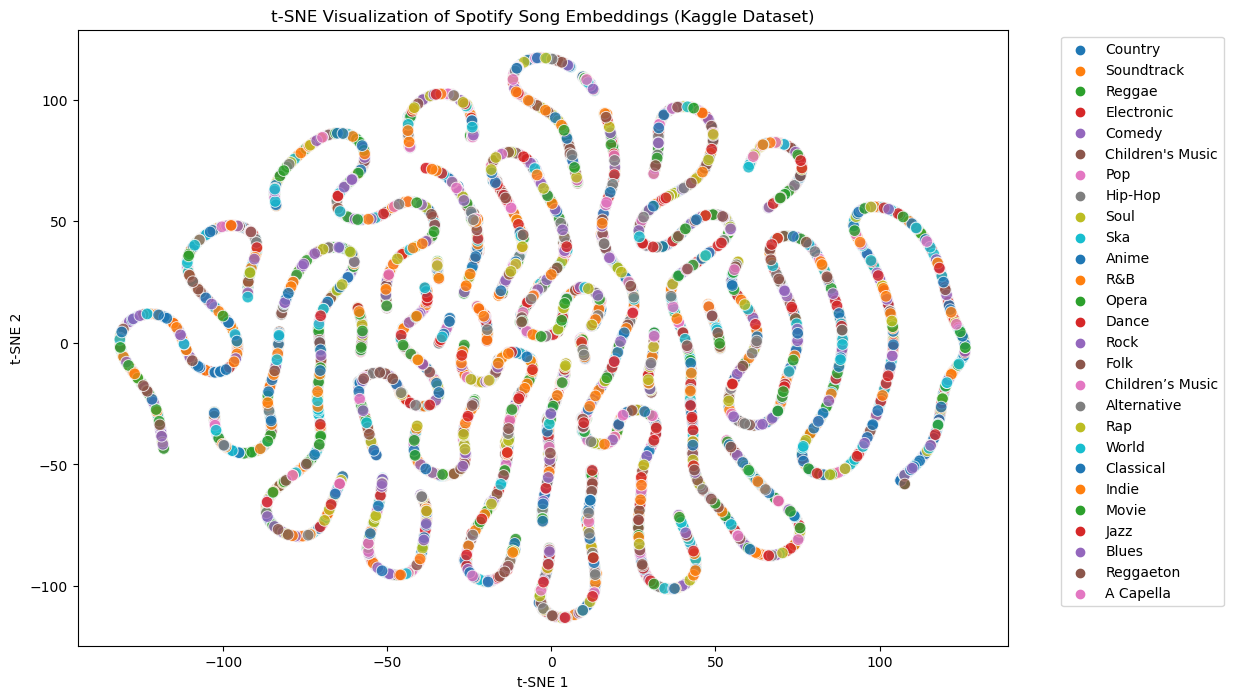

In [43]:
# Plot with color based on genre
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_subset, x='x', y='y', hue='genre', palette='tab10', s=70, alpha=0.8)
plt.title("t-SNE Visualization of Spotify Song Embeddings (Kaggle Dataset)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()